 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
######################## Reading whale returns #################################

# set path to csv file
whale_path = Path("Resources/whale_returns.csv")
# read the file and store as a dataframe 'whale_retuns" 
whale_returns = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\jahun\AppData\Local\Temp\ipykernel_9500\75559614.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum().sort_index()
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [5]:
# checking the data type of 
whale_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
############################## Reading algorithmic returns #############################
# setting the path to 'algo_returns.csv'
algo_path = Path('Resources/algo_returns.csv')
# Reading csv file and converting into dataFrame
algo_df = pd.read_csv(algo_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
# listing first 3 lines of DF to check it is showing how i like
algo_df.head(3)

C:\Users\jahun\AppData\Local\Temp\ipykernel_9500\302894036.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_path, index_col='Date', infer_datetime_format=True, parse_dates=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN


In [7]:
# Count nulls
algo_df.isnull().sum().sort_index()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.columns = ['Algorithm 1', 'Algorithm 2']
# checking to make sure no more nulls
algo_df.isnull().sum()

Algorithm 1    0
Algorithm 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
# setting my path to read 'sp500_history.csv'
sp_path = Path('Resources/sp500_history.csv')
# reading the csv file and storing as dateframe (sp5_df)
sp5_df = pd.read_csv(sp_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
# verifing that it read correctly
sp5_df = sp5_df.sort_index()

C:\Users\jahun\AppData\Local\Temp\ipykernel_9500\2613447624.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp5_df = pd.read_csv(sp_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
C:\Users\jahun\AppData\Local\Temp\ipykernel_9500\2613447624.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp5_df = pd.read_csv(sp_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [10]:
# Check Data Types
sp5_df.dtypes

Close    object
dtype: object

In [11]:
########################## Fix Data Types #####################################
# conver 'Close' to a string so can replace the '$'
sp5_df['Close'] = sp5_df['Close'].astype('str')


In [12]:
# removing '$' from closing prices listed and .replace('$','') was getting error here so step abopve
sp5_df['Close'] = sp5_df['Close'].str.replace('$','')
# now changing all the datat types in the 'Close' column to a float
sp5_df['Close'] = sp5_df['Close'].astype(float)


In [13]:
# makin sure column is now a 'float'
sp5_df.dtypes


Close    float64
dtype: object

In [14]:
# Calculate Daily Returns
sp5_returns = sp5_df.pct_change() 
sp5_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
# Drop nulls
sp5_returns.dropna(inplace=True)
sp5_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp5_returns.rename(columns={'Close': 'S&P 500'})
# checking name change
sp5_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [17]:
# dropping and nulls
sp5_returns.dropna()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_df, sp5_returns], axis='columns', join='inner')
# Renameing the columns
combined_returns.columns = ['Soros Fund','Paulson & CO','Tiger Global','Berkshire Hathaway','Algorithm 1' , 'Algorithm 2', 'S&P 500']
# checking it concatenated correctly
combined_returns.head()


,Soros Fund,Paulson & CO,Tiger Global,Berkshire Hathaway,Algorithm 1,Algorithm 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily returns on all portfolios'}, xlabel='Date'>

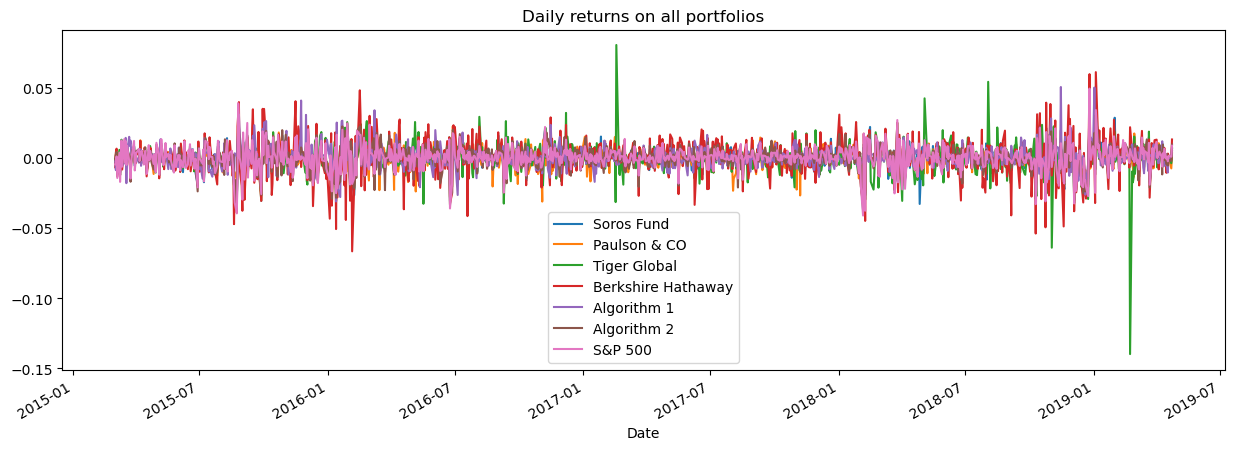

In [19]:
# Plot daily returns of all portfolios
daily_returns = combined_returns
daily_returns.columns = ['Soros Fund', 'Paulson & CO', 'Tiger Global', 'Berkshire Hathaway',
                         'Algorithm 1' , 'Algorithm 2', 'S&P 500 ']
combined_returns.plot(figsize=(15,5), title = "Daily returns on all portfolios")


#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns of all porfolios'}, xlabel='Date'>

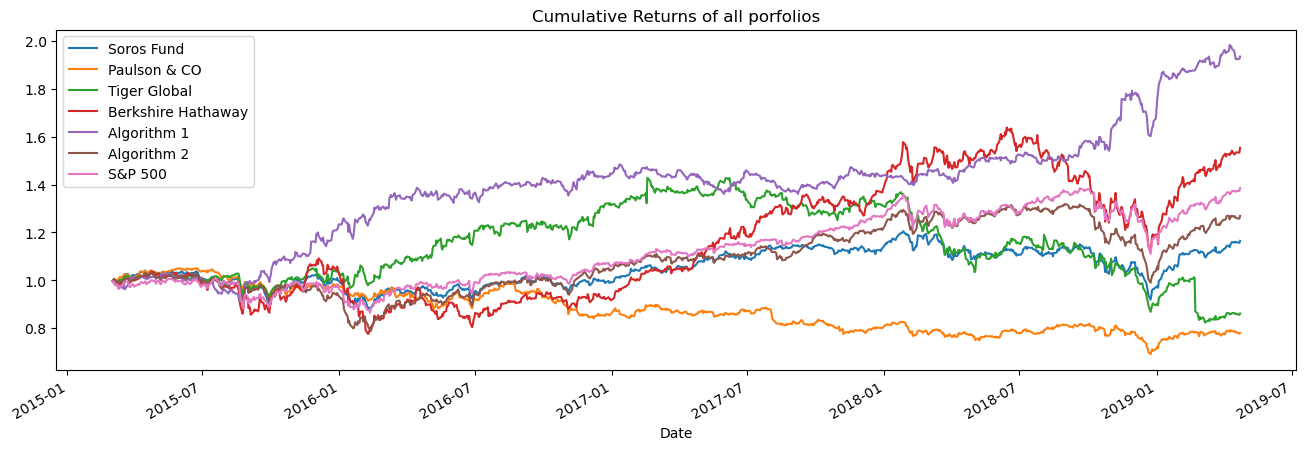

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(16,5), title = "Cumulative Returns of all porfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

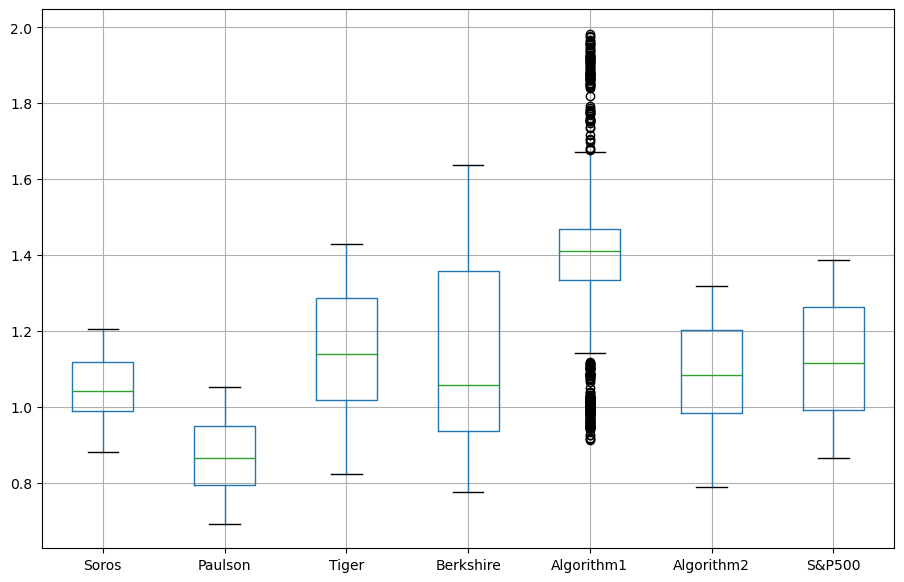

In [21]:
# Box plot to visually show risk
cumulative_returns.columns = ['Soros', 'Paulson', 'Tiger', 'Berkshire',
                              'Algorithm1', 'Algorithm2', 'S&P500']
cumulative_returns.boxplot(figsize = (11,7))


### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
cumulative_returns_std = cumulative_returns.std()
# verifing the cumulative_returns_std
cumulative_returns_std

Soros         0.073238
Paulson       0.088455
Tiger         0.149844
Berkshire     0.241575
Algorithm1    0.232277
Algorithm2    0.131700
S&P500        0.144448
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [23]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily = cumulative_returns_std['S&P500']
# Determine which portfolios are riskier than the S&P 500
index = 0
for risk in cumulative_returns_std:
    if risk == sp500_daily:
        print(f"{cumulative_returns_std.index[index]} Portfolio has as equal risk as S&P500")
    elif risk > sp500_daily:
        print(f"{cumulative_returns_std.index[index]} Portfolio is more risky than S&P500")
    elif risk < sp500_daily:
        print(f"{cumulative_returns_std.index[index]} Portfolio is less risky than S&P500")
    else:
        print(f"{cumulative_returns_std.index[index]} Portfolio has no enough data to determine risk")
    index += 1

Soros Portfolio is less risky than S&P500
Paulson Portfolio is less risky than S&P500
Tiger Portfolio is more risky than S&P500
Berkshire Portfolio is more risky than S&P500
Algorithm1 Portfolio is more risky than S&P500
Algorithm2 Portfolio is less risky than S&P500
S&P500 Portfolio has as equal risk as S&P500


### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
annulized_std = cumulative_returns_std * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling Standard Deviation for all portfolios over 21 day period'}, xlabel='Date'>

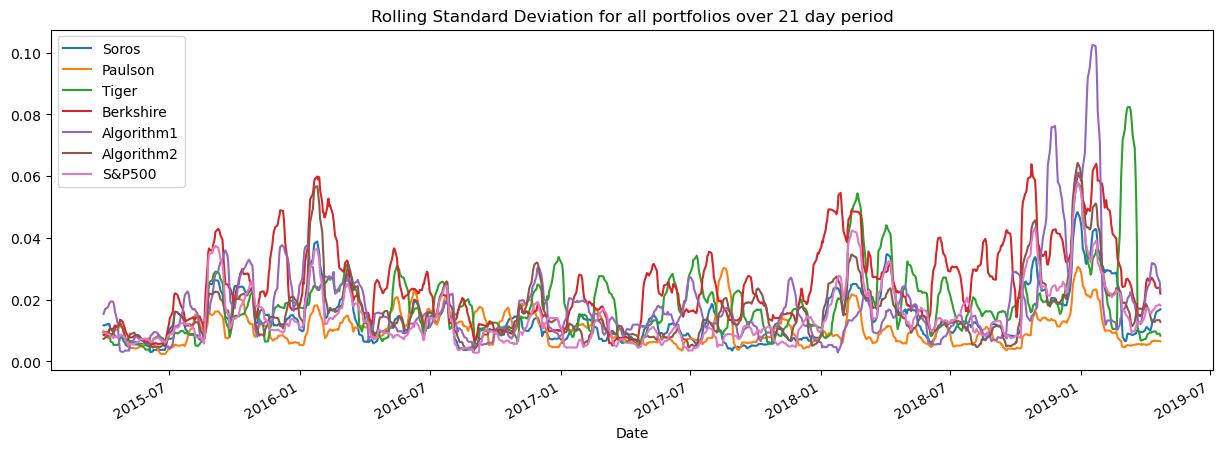

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = cumulative_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(15,5), title= 'Rolling Standard Deviation for all portfolios over 21 day period')

### Calculate and plot the correlation

<Axes: title={'center': 'Correlation for Newly Combined Protfolios'}>

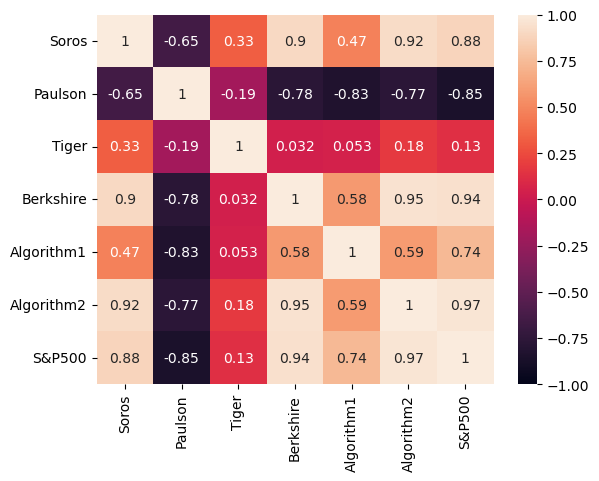

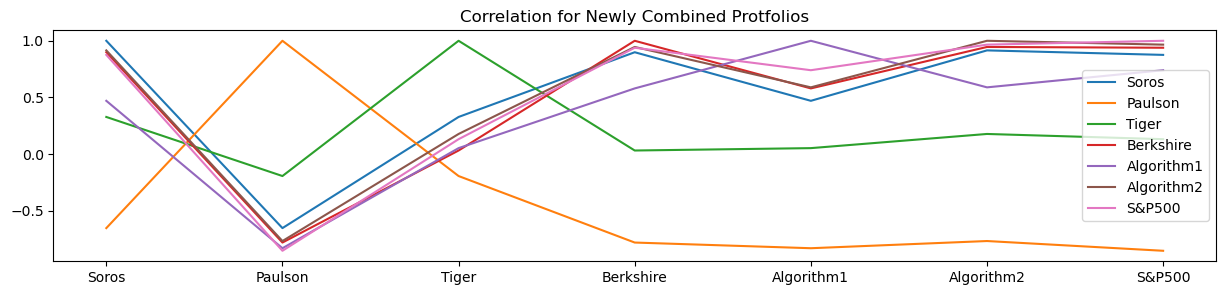

In [26]:
# Calculate the correlation
correlation_matrix = cumulative_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
correlation_matrix.plot(figsize=(15,3), title='Correlation for Newly Combined Protfolios')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Algorithm 2 - Beta Trend'}, xlabel='Date'>

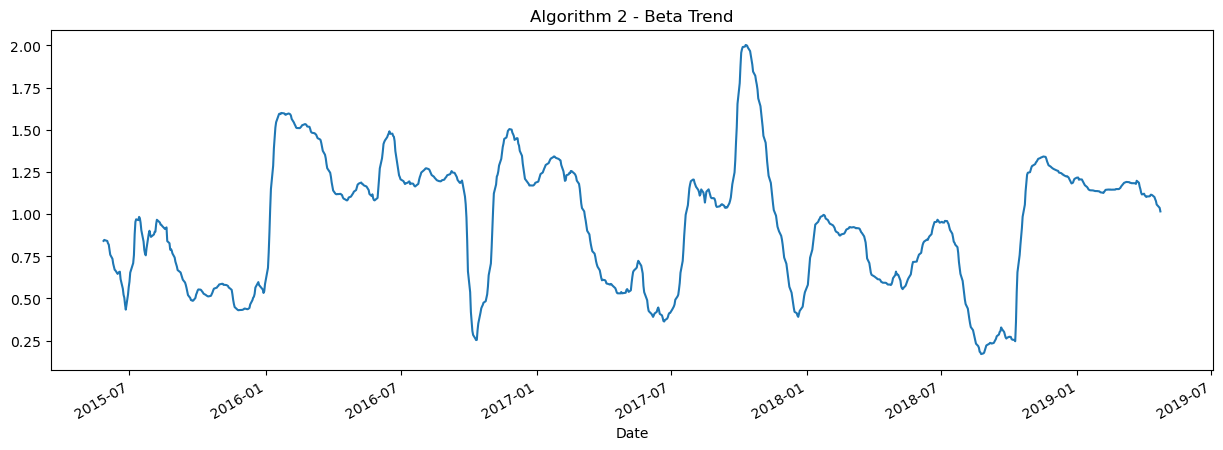

In [27]:
# Calculate covariance of a single portfolio
covariance_algo2 = cumulative_returns['Algorithm2'].rolling(window=60).cov(cumulative_returns['S&P500'])

# Calculate variance of S&P 500
variance_sp500 = cumulative_returns['S&P500'].rolling(window=60).var()
# Computing beta
algo2_beta = covariance_algo2 / variance_sp500
# Plot beta trend
algo2_beta.plot(figsize=(15,5), title = "Algorithm 2 - Beta Trend")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [28]:
# Use `ewm` to calculate the rolling window
cumulative_returns_std.ewm(halflife=21).mean()

Soros         0.073238
Paulson       0.080972
Tiger         0.104691
Berkshire     0.140625
Algorithm1    0.160185
Algorithm2    0.155037
S&P500        0.153371
dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratio = (daily_returns.mean() - daily_returns['S&P 500 '].mean())/(daily_returns.std())

<Axes: title={'center': 'Daily Sharpe Ratios'}>

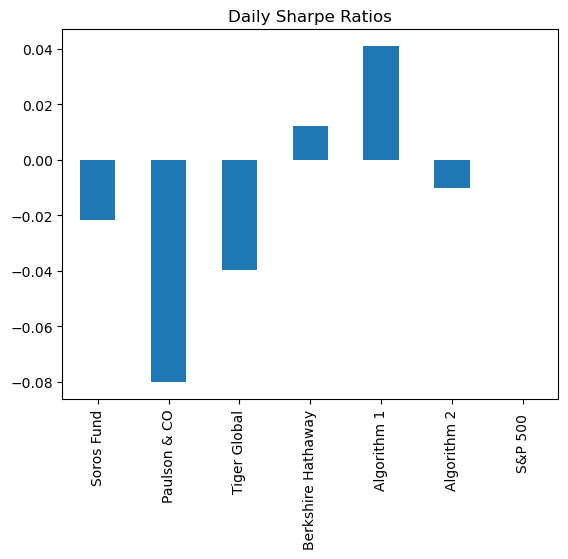

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title = 'Daily Sharpe Ratios') 

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.



In [31]:
# The performance of Algorithm 1 strategy compared to the S&P 500 and the Whale portfolios using Sharpe Ratio

# setting variables
index = 0
algo1_performance = sharpe_ratio['Algorithm 1']

# Determine the comparison of Algo1 and other portfolios
for performance in sharpe_ratio:
    if sharpe_ratio.index[index] == 'Algorithm 1':
        continue
    if performance == algo1_performance:
        print(f'Algorithm 1 and the {combined_returns.columns[index]} Portfolio performed equally in our analysis.')
    elif performance < algo1_performance:
        print(f'Alogrithm 1 outperformed {combined_returns.columns[index]} Portfolio')
    elif performance > algo1_performance:
        print(f'Algorithm 1 underperformed when compared to {combined_returns.columns[index]} Portfolio')
    else:
        print(f'This wont even make a wave! No worries everything great starts small!')
    index+=1
        

Alogrithm 1 outperformed Soros Fund Portfolio
Alogrithm 1 outperformed Paulson & CO Portfolio
Alogrithm 1 outperformed Tiger Global Portfolio
Alogrithm 1 outperformed Berkshire Hathaway Portfolio


In [32]:
# The performance of Algorithm 2 strategy compared to the S&P 500 and the Whale portfolios using Sharpe Ratio

# setting variables
index = 0
algo2_performance = sharpe_ratio['Algorithm 2']

# Determine the comparison of Algo1 and other portfolios
for performance in sharpe_ratio:
    if sharpe_ratio.index[index] == 'Algorithm 2':
        continue
    if performance == algo2_performance:
        print(f'Algorithm 2 and the {combined_returns.columns[index]} Portfolio performed equally in our analysis.')
    elif performance < algo2_performance:
        print(f'Alogrithm 2 outperformed {combined_returns.columns[index]} Portfolio')
    elif performance > algo2_performance:
        print(f'Algorithm 2 underperformed when compared to {combined_returns.columns[index]} Portfolio')
    else:
        print(f'This wont even make a wave! No worries everything great starts small!')
    index+=1
        

Alogrithm 2 outperformed Soros Fund Portfolio
Alogrithm 2 outperformed Paulson & CO Portfolio
Alogrithm 2 outperformed Tiger Global Portfolio
Algorithm 2 underperformed when compared to Berkshire Hathaway Portfolio
Algorithm 2 underperformed when compared to Algorithm 1 Portfolio


-----

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Apple, CostCo, and Google

In [36]:
# Reading data from 1st stock -- Apple

# Setting csv path
aapl_path = Path('Resources/aapl_historical.csv')
# reading csv file and storing as 'appl' dataframe
aapl_df = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

C:\Users\jahun\AppData\Local\Temp\ipykernel_9500\2478268213.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)


In [37]:
# Reading data from 2nd stock -- Costco

# setting the csv path
cost_path = Path('Resources/cost_historical.csv')
# reading the csv file and storing as 'cost' dataframe
cost_df = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

C:\Users\jahun\AppData\Local\Temp\ipykernel_9500\2438308769.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_df = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)


In [38]:
# Reading data from the 3rd stock -- Google

# setting the csv path
goog_path = Path('Resources/goog_historical.csv')
# reeading the csv file and storing as 'goog' dataframe
goog_df = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

C:\Users\jahun\AppData\Local\Temp\ipykernel_9500\1399975269.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_df = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)


In [39]:
my_stocks = pd.concat([aapl_df.NOCP, cost_df.NOCP, goog_df.NOCP], axis="columns", join="inner") 
my_stocks.columns = ['aapl','cost','goog']


In [40]:
# Reset Date index
my_stocks.sort_index(inplace=True)

In [41]:
# Calculate daily returns & Drop NAs
daily_returns = my_stocks.pct_change()
daily_returns.dropna(inplace = True)
# Display sample data
daily_returns.head()

,aapl,cost,goog
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


<Axes: title={'center': 'Daily Returns for my porfolio'}, xlabel='Trade DATE'>

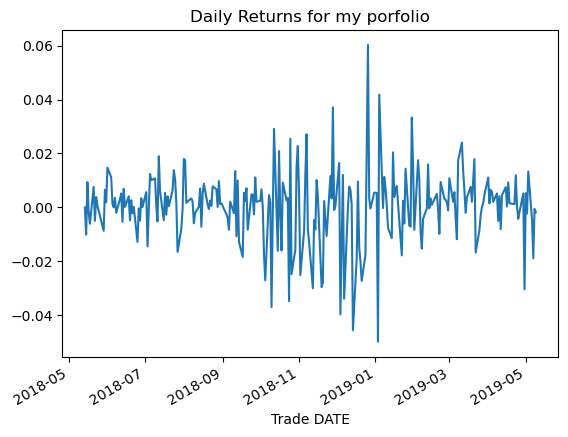

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns  = daily_returns.dot(weights)
my_portfolio_returns.plot(title= 'Daily Returns for my porfolio')
#my_portfolio_returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns['My portfolio'] = my_portfolio_returns
joined_portfolios = combined_returns

In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_portfolios.dropna(inplace = True)
#all_returns
joined_portfolios

,Soros Fund,Paulson & CO,Tiger Global,Berkshire Hathaway,Algorithm 1,Algorithm 2,S&P 500,My portfolio
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545


## Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized '.std()'
joined_portfolios_std = joined_portfolios.std()
annualized_std = joined_portfolios_std * np.sqrt(252)

## Calculate and plot the rolling 'std' with a 21- Day window

<Axes: title={'center': 'Rolling 21-Day standard deviation'}, xlabel='Date'>

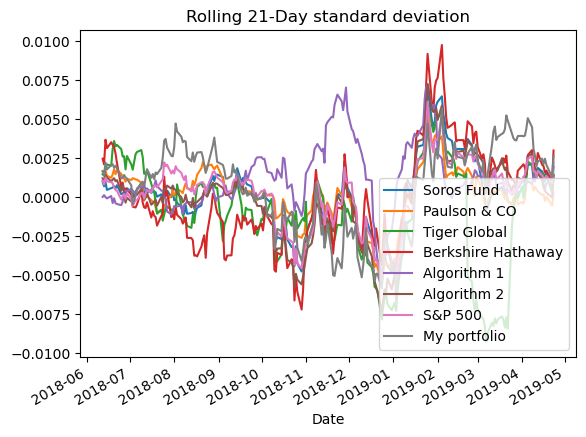

In [46]:
# Calculate the rolling standard deviation with a 21- DAy window
joined_portfolios_rolling_std = joined_portfolios.rolling(window=21).mean()

# Plot rolling 'std'
joined_portfolios_rolling_std.plot(title = 'Rolling 21-Day standard deviation')

## Calculate and Plot the correlation

<Axes: title={'center': 'Correlation for Newly Combined Portfolios'}>

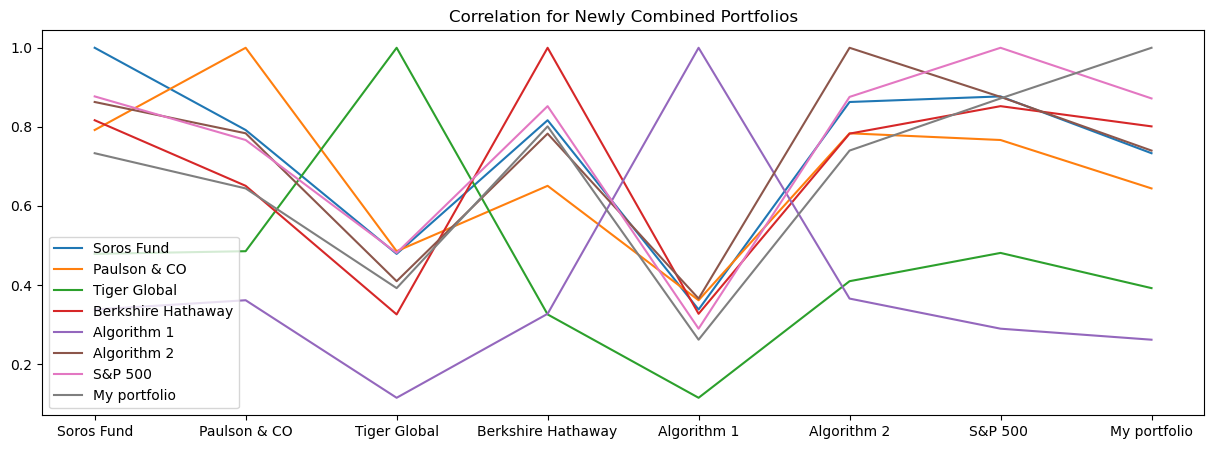

In [47]:
# Calculate the correlation
new_correlation = joined_portfolios.corr()
# Plot the correlation
new_correlation.plot(figsize=(15,5), title = 'Correlation for Newly Combined Portfolios')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling Beta of my portfolio compared to S&P 500'}, xlabel='Date'>

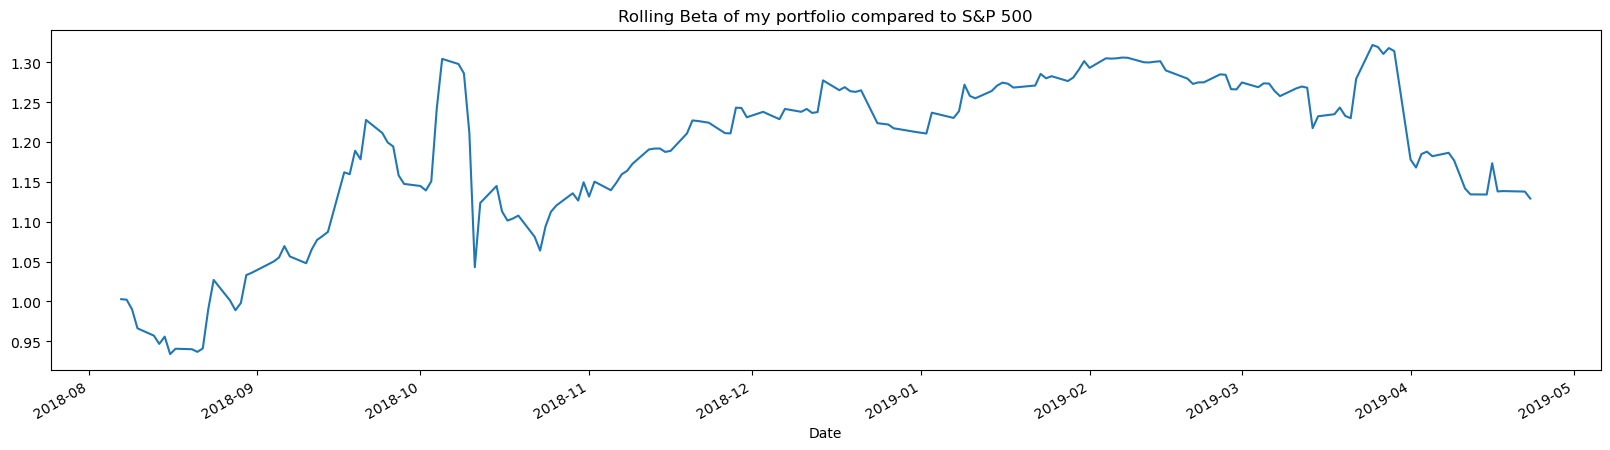

In [48]:
# Calculate and plot Beta
new_covariance = joined_portfolios['My portfolio'].rolling(window=60).cov(joined_portfolios['S&P 500 '])
new_variance = joined_portfolios['S&P 500 '].rolling(window=60).var()

joined_portfolios_rolling_beta = new_covariance / new_variance
joined_portfolios_rolling_beta.plot(figsize=(20, 5), title='Rolling Beta of my portfolio compared to S&P 500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = ((joined_portfolios.mean()-joined_portfolios['S&P 500 '].mean()) * 252)/ (joined_portfolios.std() * np.sqrt(252))


<Axes: title={'center': 'Sharpe Ratio'}>

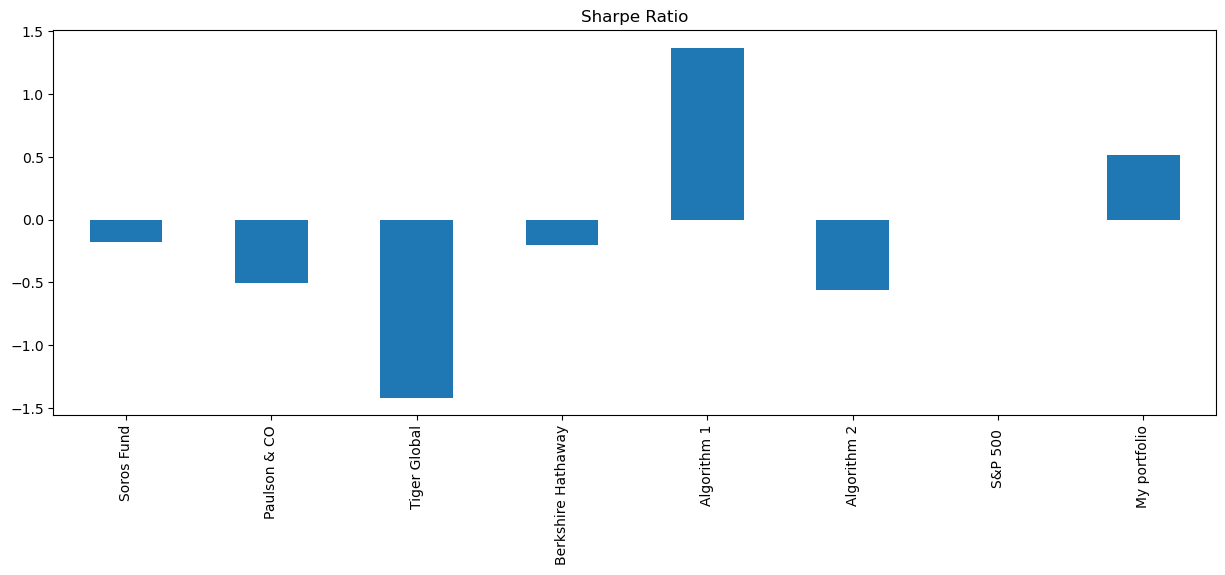

In [50]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title='Sharpe Ratio', figsize=(15,5))

### The results of my Portfolio compared to the Whales

In [52]:
# Set variables
index=0
my_performance = sharpe_ratio["My portfolio"]

# Determine portfolios performance in comarison
for performance in sharpe_ratio:
    if sharpe_ratio.index[index] == 'My portfolio':
        continue
    if performance == 'My portfolio':
        print(f"My portfolio and {joined_portfolios.columns[index]} portfolio performed equally well.")
    elif performance < my_performance:
        print(f"My portfolio outperformed {joined_portfolios.columns[index]} portfolio.")
    elif performance > my_performance:
        print(f"My portfolio was outperformed by {joined_portfolios.columns[index]} portfolio.")
    else:
        print("Better do more research... Back to the drawing board with ya.")
    index+=1


My portfolio outperformed Soros Fund portfolio.
My portfolio outperformed Paulson & CO portfolio.
My portfolio outperformed Tiger Global portfolio.
My portfolio outperformed Berkshire Hathaway portfolio.
My portfolio was outperformed by Algorithm 1 portfolio.
My portfolio outperformed Algorithm 2 portfolio.
My portfolio outperformed S&P 500  portfolio.
